In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Dibya\\Desktop\\Kaggle\\bike_sharing'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'bikes - Copy (2).py',
 'bikes - Copy (3).py',
 'bikes - Copy (4).py',
 'bikes - Copy.py',
 'bikes.py',
 'bike_count.csv',
 'sampleSubmission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
df.groupby('weather').casual.sum()

weather
1    289900
2     87246
3     14983
4         6
Name: casual, dtype: int64

In [12]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [13]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
df[['year','month','day']] = df.datetime.str.split('-',expand=True)

In [15]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day'],
      dtype='object')

In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01 04:00:00


In [17]:
df.day = df.day.str.replace(':00:00','')

In [18]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01 00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01 01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01 02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01 03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01 04


In [19]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19 19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19 20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19 21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19 22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19 23


In [20]:
df[['day','hour']] = df.day.str.split(' ',expand=True)

In [21]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23


In [22]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [23]:
df.rename(columns={'count':'Count'},inplace=True)

In [24]:
df_new = df.groupby(['year','month']).Count.sum()

In [25]:
df_new.head()

year  month
2011  01       23552
      02       32844
      03       38735
      04       50517
      05       79713
Name: Count, dtype: int64

In [26]:
import seaborn as sns


In [27]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [28]:
plt.style.use('seaborn-dark')

In [29]:
df_new.head()

year  month
2011  01       23552
      02       32844
      03       38735
      04       50517
      05       79713
Name: Count, dtype: int64

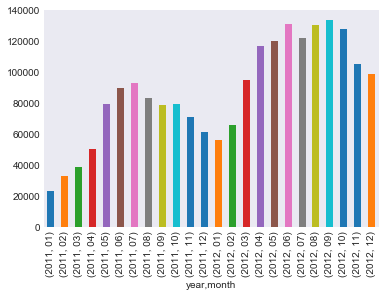

In [30]:
df_new.plot(kind='bar')
plt.show()

In [31]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04


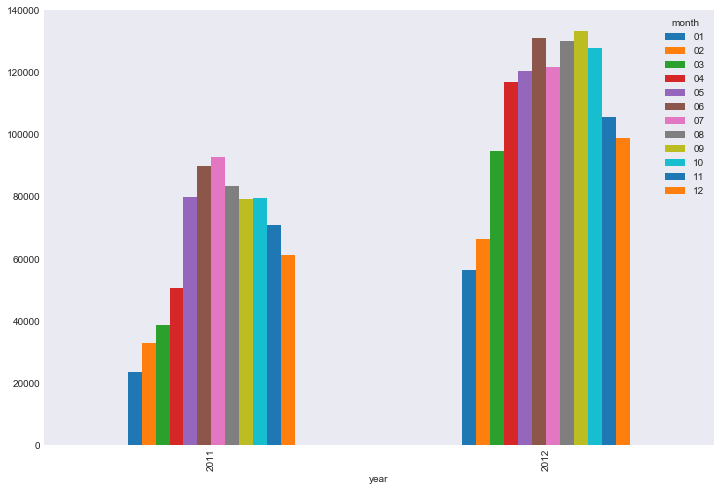

In [39]:
df.groupby(['year','month']).Count.sum().unstack().plot(kind='bar',figsize=(12,8))
plt.show()

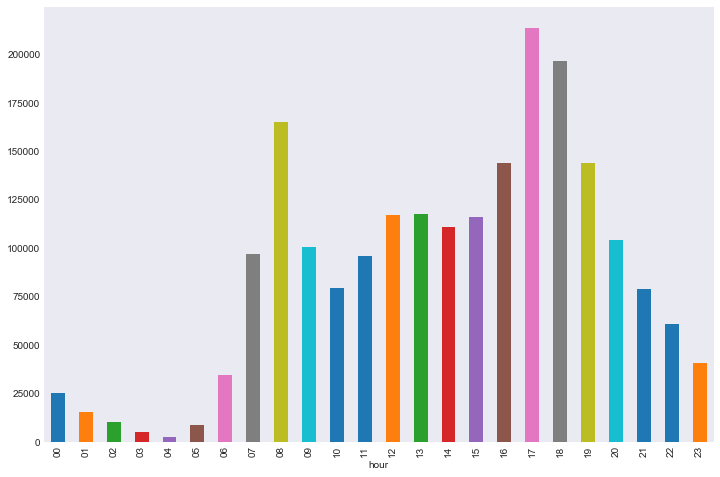

In [42]:
df.groupby('hour').Count.sum().plot(kind='bar',figsize=(12,8))
plt.show()

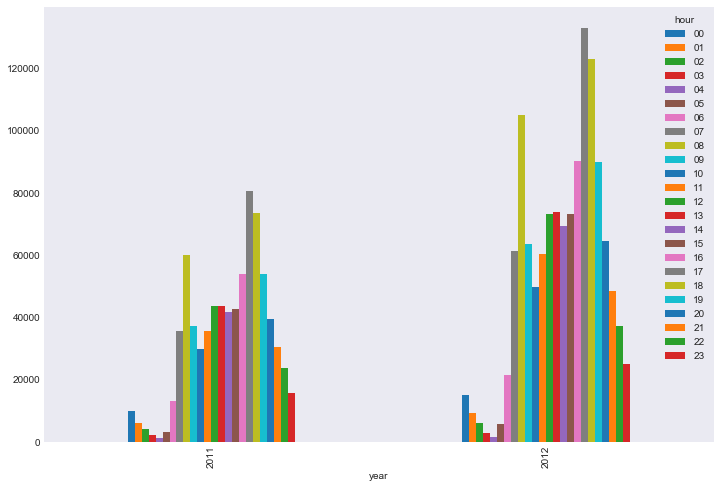

In [49]:
df.groupby(['year','hour']).Count.sum().unstack().plot(kind='bar',figsize=(12,8))
plt.show()

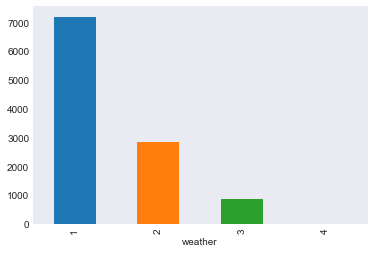

In [52]:
df.groupby(['weather']).Count.count().plot(kind='bar')
plt.show()

In [54]:
pd.crosstab(index=df.weather,columns=df.day,values=df.Count,aggfunc='sum').fillna(0)

day,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19
weather,,,,,,,,,,,,,,,,,,,
1,57481.0,73193.0,73755.0,83428.0,81897.0,84981.0,69300.0,67036.0,74882.0,87444.0,85251.0,84675.0,86262.0,78722.0,81320.0,77390.0,84809.0,71904.0,72333.0
2,36323.0,21589.0,32827.0,27862.0,23514.0,16974.0,30764.0,28378.0,28791.0,20200.0,22143.0,20549.0,20902.0,28402.0,30196.0,25542.0,29246.0,31249.0,31709.0
3,9888.0,10599.0,4979.0,1045.0,3704.0,6645.0,5422.0,7356.0,4204.0,4001.0,3752.0,4033.0,4284.0,5282.0,4161.0,6905.0,4200.0,5284.0,6345.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


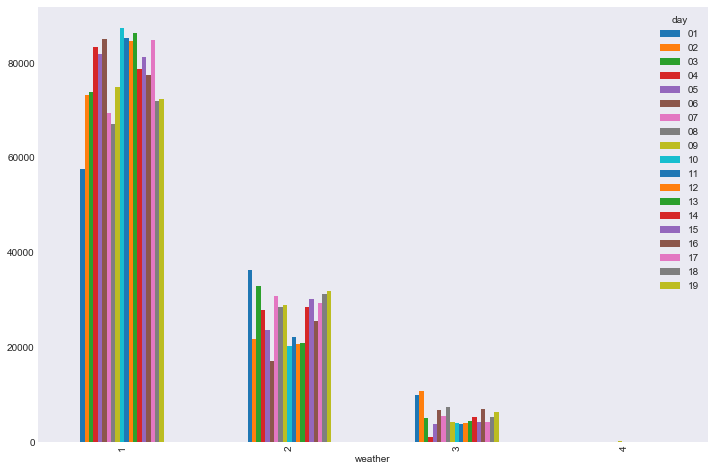

In [56]:
pd.crosstab(index=df.weather,columns=df.day,values=df.Count,aggfunc='sum').fillna(0).plot(kind='bar',figsize=(12,8))

In [60]:
df.groupby(['season','month']).month.count()

season  month
1       01       884
        02       901
        03       901
2       04       909
        05       912
        06       912
3       07       912
        08       912
        09       909
4       10       911
        11       911
        12       912
Name: month, dtype: int64

Season and Months are highly co-related. We can drop the season col from the final dataset

In [61]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04


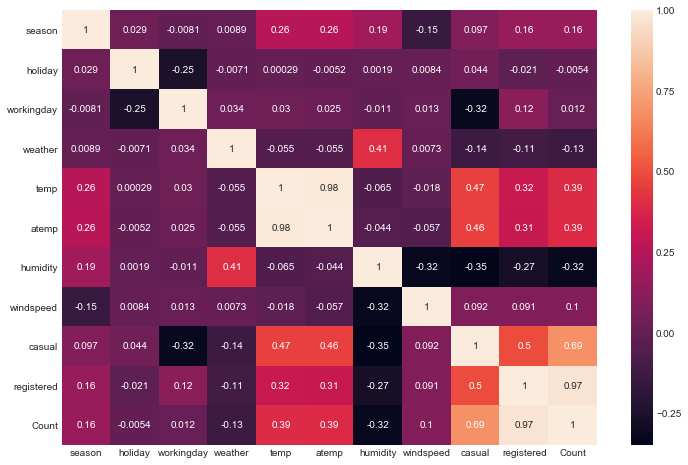

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


Heatmap shows how the atemp and temp are highly correlated



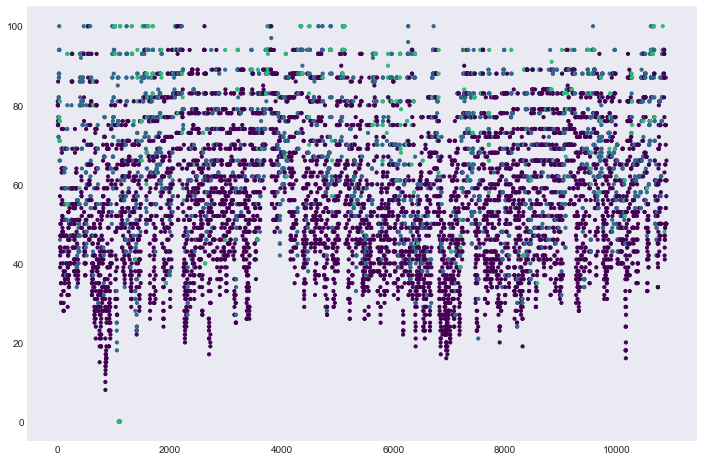

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.index,y=df.humidity,s=10,c=df.weather,cmap='viridis')
plt.show()

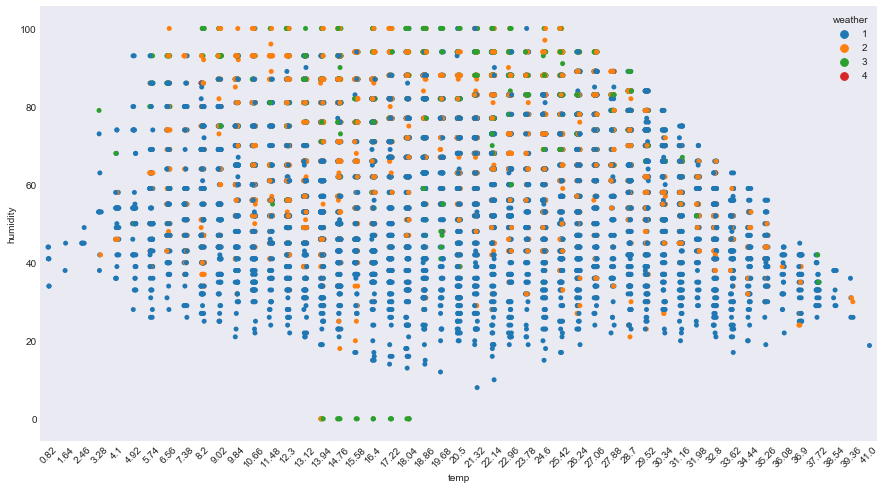

In [92]:
plt.figure(figsize=(15,8))
sns.stripplot(data=df,x='temp',y='humidity',hue='weather')
plt.xticks(rotation=45)
plt.show()

In [74]:
df.temp.min()

0.82

In [80]:
df.temp.max()

41.0

In [83]:
np.linspace(df.temp.min(),df.temp.max(),10)

array([ 0.82      ,  5.28444444,  9.74888889, 14.21333333, 18.67777778,
       23.14222222, 27.60666667, 32.07111111, 36.53555556, 41.        ])

In [95]:
df.humidity.value_counts(bins=5)

(40.0, 60.0]      3564
(60.0, 80.0]      3382
(80.0, 100.0]     2302
(20.0, 40.0]      1560
(-0.101, 20.0]      78
Name: humidity, dtype: int64

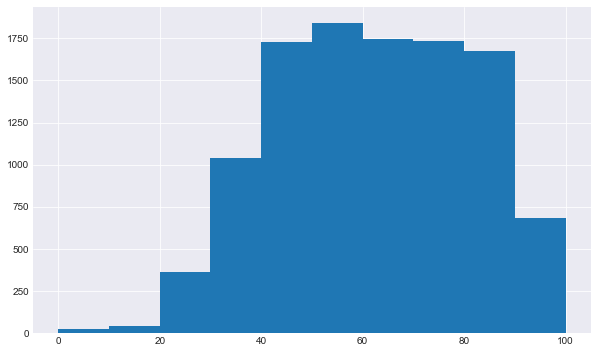

In [139]:
plt.figure(figsize=(10,6))
plt.hist(df.humidity,bins=10)
plt.grid(True)
plt.show()

In [142]:
humid_bins = [-1,21,30,40,90,200]
labels = ['humid_'+str(s) for s in range(1,6)]
df['humid_cat'] = pd.cut(x=df.humidity,bins=humid_bins,labels=labels,)

In [141]:
df.humidity.value_counts(bins=10)

(60.0, 70.0]      1845
(50.0, 60.0]      1814
(40.0, 50.0]      1750
(80.0, 90.0]      1620
(70.0, 80.0]      1537
(30.0, 40.0]      1146
(90.0, 100.0]      682
(20.0, 30.0]       414
(10.0, 20.0]        54
(-0.101, 10.0]      24
Name: humidity, dtype: int64

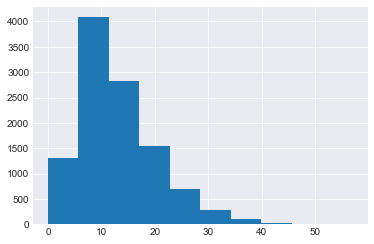

In [143]:
plt.hist(df.windspeed,bins=10)
plt.grid(True)
plt.show()

In [107]:
df.windspeed.value_counts(bins=10)

(5.7, 11.399]       4083
(11.399, 17.099]    2827
(17.099, 22.799]    1540
(-0.058, 5.7]       1313
(22.799, 28.498]     696
(28.498, 34.198]     280
(34.198, 39.898]     107
(39.898, 45.598]      31
(45.598, 51.297]       6
(51.297, 56.997]       3
Name: windspeed, dtype: int64

In [144]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Count,year,month,day,hour,wind_cat,humid_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,wind_1,humid_4
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,wind_1,humid_4
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,wind_1,humid_4
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03,wind_1,humid_4
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04,wind_1,humid_4


In [128]:
wind_bins = [-5,6,12,18,23,29,35,40,45,52,90]
labels = ['wind_'+str(s) for s in range(1,11)]
df['wind_cat'] = pd.cut(x=df.windspeed,bins=wind_bins,labels=labels,)

In [129]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Count,year,month,day,hour,wind_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,wind_1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,wind_1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,wind_1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03,wind_1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04,wind_1


In [132]:
df.groupby('wind_cat').Count.sum()

wind_cat
wind_1     211526
wind_2     715079
wind_3     590389
wind_4     327059
wind_5     155059
wind_6      57429
wind_7      22460
wind_8       5277
wind_9        659
wind_10       539
Name: Count, dtype: int64

In [145]:
df.groupby('humid_cat').Count.sum()

humid_cat
humid_1      18623
humid_2     119377
humid_3     329482
humid_4    1564495
humid_5      53499
Name: Count, dtype: int64

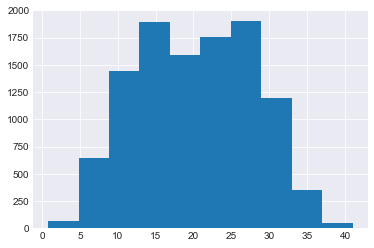

In [148]:
plt.hist(df.temp,bins=10)
plt.grid(True)
plt.show()

In [149]:
temp_bins = [-5,5,9,13,17,21,25,29,33,37,90]
labels = ['temp_'+str(s) for s in range(1,11)]
df['temp_cat'] = pd.cut(x=df.temp,bins=temp_bins,labels=labels,)

In [146]:
df.temp.value_counts(bins=10)

(24.928, 28.946]    1901
(12.874, 16.892]    1891
(20.91, 24.928]     1753
(16.892, 20.91]     1587
(8.856, 12.874]     1440
(28.946, 32.964]    1194
(4.838, 8.856]       648
(32.964, 36.982]     355
(0.779, 4.838]        69
(36.982, 41.0]        48
Name: temp, dtype: int64

In [151]:
df.groupby('temp_cat').Count.sum()

temp_cat
temp_1       6871
temp_2      41599
temp_3     140705
temp_4     298127
temp_5     281000
temp_6     369800
temp_7     433512
temp_8     377125
temp_9     121570
temp_10     15167
Name: Count, dtype: int64

In [152]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Count,year,month,day,hour,wind_cat,humid_cat,temp_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,wind_1,humid_4,temp_3
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,wind_1,humid_4,temp_3
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,wind_1,humid_4,temp_3
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03,wind_1,humid_4,temp_3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04,wind_1,humid_4,temp_3


<Figure size 864x576 with 0 Axes>

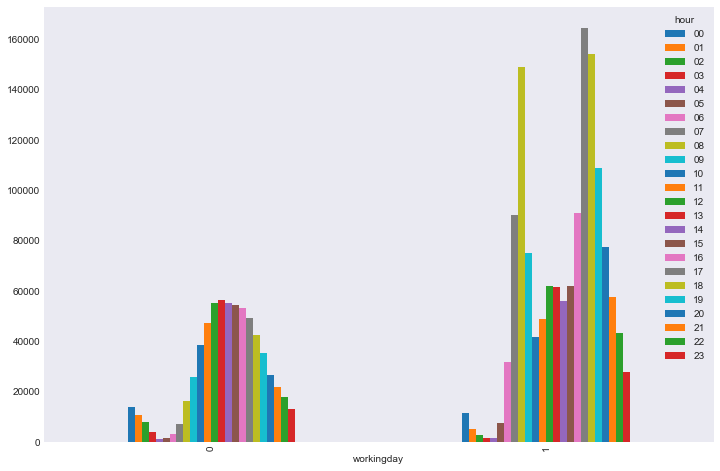

In [158]:

df.groupby(['workingday','hour']).Count.sum().unstack().plot(kind='bar',figsize=(12,8))
plt.show()

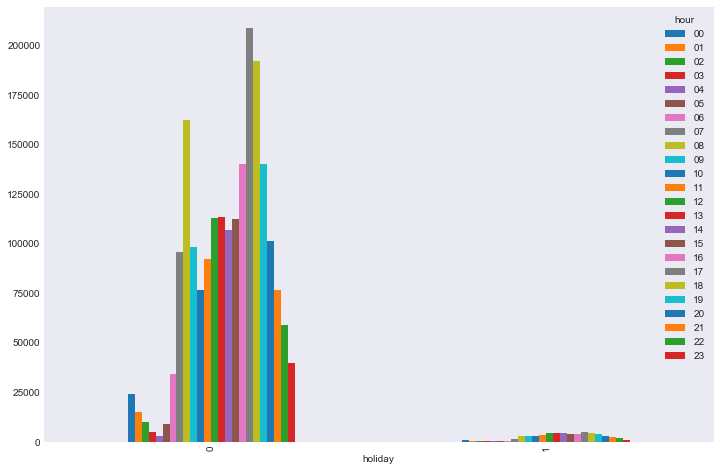

In [160]:
df.groupby(['holiday','hour']).Count.sum().unstack().plot(kind='bar',figsize=(12,8))
plt.show()

In [167]:
df_new = pd.get_dummies(df,columns=['year','hour','month','weather','workingday','holiday','temp_cat','wind_cat','humid_cat'],
                        drop_first=True)

In [168]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'Count',
       'year', 'month', 'day', 'hour', 'wind_cat', 'humid_cat', 'temp_cat'],
      dtype='object')

In [169]:
df_new.shape

(10886, 72)

In [170]:
df_new.head()

,datetime,season,temp,atemp,humidity,windspeed,casual,registered,Count,day,...,wind_cat_wind_5,wind_cat_wind_6,wind_cat_wind_7,wind_cat_wind_8,wind_cat_wind_9,wind_cat_wind_10,humid_cat_humid_2,humid_cat_humid_3,humid_cat_humid_4,humid_cat_humid_5
0,2011-01-01 00:00:00,1,9.84,14.395,81,0.0,3,13,16,01,...,0,0,0,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,9.02,13.635,80,0.0,8,32,40,01,...,0,0,0,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,9.02,13.635,80,0.0,5,27,32,01,...,0,0,0,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,9.84,14.395,75,0.0,3,10,13,01,...,0,0,0,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,9.84,14.395,75,0.0,0,1,1,01,...,0,0,0,0,0,0,0,0,1,0


In [171]:
df_new.columns

Index(['datetime', 'season', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'Count', 'day', 'year_2012', 'hour_01',
       'hour_02', 'hour_03', 'hour_04', 'hour_05', 'hour_06', 'hour_07',
       'hour_08', 'hour_09', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_02', 'month_03',
       'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09',
       'month_10', 'month_11', 'month_12', 'weather_2', 'weather_3',
       'weather_4', 'workingday_1', 'holiday_1', 'temp_cat_temp_2',
       'temp_cat_temp_3', 'temp_cat_temp_4', 'temp_cat_temp_5',
       'temp_cat_temp_6', 'temp_cat_temp_7', 'temp_cat_temp_8',
       'temp_cat_temp_9', 'temp_cat_temp_10', 'wind_cat_wind_2',
       'wind_cat_wind_3', 'wind_cat_wind_4', 'wind_cat_wind_5',
       'wind_cat_wind_6', 'wind_cat_wind_7', 'wind_cat_wind_8',
       'wind_cat_wind_9', '

In [172]:
df_final = df_new.drop(columns=['datetime','season','temp', 'atemp', 'humidity', 'windspeed',
                                'casual', 'registered','day'])

In [173]:
df_final.shape

(10886, 63)

In [174]:
df_final.columns


Index(['Count', 'year_2012', 'hour_01', 'hour_02', 'hour_03', 'hour_04',
       'hour_05', 'hour_06', 'hour_07', 'hour_08', 'hour_09', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06',
       'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12',
       'weather_2', 'weather_3', 'weather_4', 'workingday_1', 'holiday_1',
       'temp_cat_temp_2', 'temp_cat_temp_3', 'temp_cat_temp_4',
       'temp_cat_temp_5', 'temp_cat_temp_6', 'temp_cat_temp_7',
       'temp_cat_temp_8', 'temp_cat_temp_9', 'temp_cat_temp_10',
       'wind_cat_wind_2', 'wind_cat_wind_3', 'wind_cat_wind_4',
       'wind_cat_wind_5', 'wind_cat_wind_6', 'wind_cat_wind_7',
       'wind_cat_wind_8', 'wind_cat_wind_9', 'wind_cat_wind_10',
       'humid_cat_humid_2', 'humid_cat_humid_3', 'humid_cat_humid_4',
       'humid_cat_hu

In [175]:
df_final.head()

,Count,year_2012,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,...,wind_cat_wind_5,wind_cat_wind_6,wind_cat_wind_7,wind_cat_wind_8,wind_cat_wind_9,wind_cat_wind_10,humid_cat_humid_2,humid_cat_humid_3,humid_cat_humid_4,humid_cat_humid_5
0,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,40,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,32,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [176]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [177]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [178]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [179]:
X = df_final.drop(columns='Count')
y = df_final['Count']

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [187]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]


In [188]:
rmsle=[]
for model in range (len(models)):
    clf=models[model]
    print('fitting model %s' %model)
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))

fitting model 0
fitting model 1
fitting model 2
fitting model 3
fitting model 4


In [189]:
rmsle

[0.47552155133235985,
 1.5955291797167335,
 0.48422754708247123,
 1.412969242344768,
 0.9128050718482603]